In [1]:
import pandas as pd
import os
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shutil

In [4]:
def create_data_inverterwise(year):
    initial_folder = f"Data/Required Data Yearwise/{year} Required"
    file_names = os.listdir(initial_folder)
    id_variables = [re.match("\d+_index_\d+_([^_]+)_([^.]+)", file_name).groups() for file_name in file_names]

    grouped_items = {}

    for item in id_variables:
        if item[0] in grouped_items.keys():
            grouped_items[item[0]].append(item[1])
        else:
            grouped_items.update({item[0]:[item[1]]})
    
    dest_folder = "Data/Required Data Inverterwise/"

    for folder in grouped_items.keys():
        if not os.path.exists(f'{dest_folder}/{folder}'):
            os.mkdir(f'{dest_folder}/{folder}')

    for name in file_names:
        folder = [folder for folder in grouped_items.keys() if folder in name]
        fil_name = [fil_name for fil_name in grouped_items[folder[0]] if fil_name in name]
        shutil.copy(f"{initial_folder}/{name}", f"{dest_folder}/{folder[0]}/{year}_{fil_name[0]}.csv")

In [5]:
# create_data_inverterwise('2019')
# create_data_inverterwise('2020')
# create_data_inverterwise('2021')

In [2]:
total_energy_inv01_2019 = pd.read_csv("Data/Required Data Inverterwise/inv01/2019_total_energy_data.csv")
total_energy_inv01_2020 = pd.read_csv("Data/Required Data Inverterwise/inv01/2020_total_energy_data.csv")
total_energy_inv01_2021 = pd.read_csv("Data/Required Data Inverterwise/inv01/2021_total_energy_data.csv")

In [3]:
today_energy_inv01_2019 = pd.read_csv("Data/Required Data Inverterwise/inv01/2019_today_energy_data.csv")
today_energy_inv01_2020 = pd.read_csv("Data/Required Data Inverterwise/inv01/2020_today_energy_data.csv")
today_energy_inv01_2021 = pd.read_csv("Data/Required Data Inverterwise/inv01/2021_today_energy_data.csv")

In [4]:
total_energy_inv01_2020.loc[:, 'Date'] = pd.to_datetime(total_energy_inv01_2020[['Date']].stack()).unstack()

In [36]:
total_energy_inv01_2020[total_energy_inv01_2020.Value > 0].agg(['min', 'max'])

,Date,Timestamp,Value,Signal
min,2020-03-15 12:31:00,1584255660000,12332,Inv01_Total_Energy
max,2020-12-31 17:53:00,1609417380000,251707599,Inv01_Total_Energy


<AxesSubplot:xlabel='Date', ylabel='Value'>

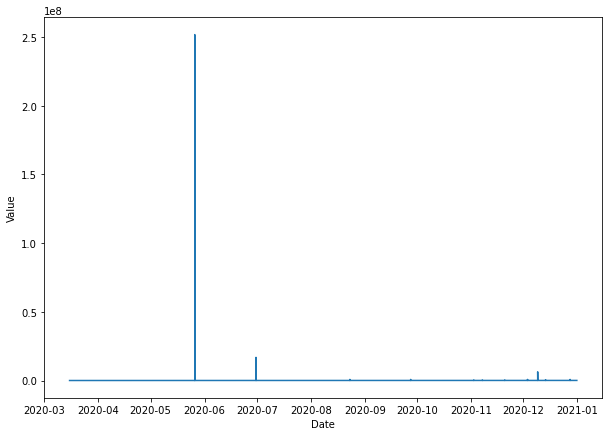

In [65]:
plt.figure(figsize=(10,7))
condition = ~(total_energy_inv01_2020.Value.isin(list(total_energy_inv01_2020.sort_values('Value', ascending=False).head(11)['Value'])))
sns.lineplot(x = 'Date', y = 'Value',data = total_energy_inv01_2020[(total_energy_inv01_2020.Value != 0) & condition])

<AxesSubplot:xlabel='Date', ylabel='Value'>

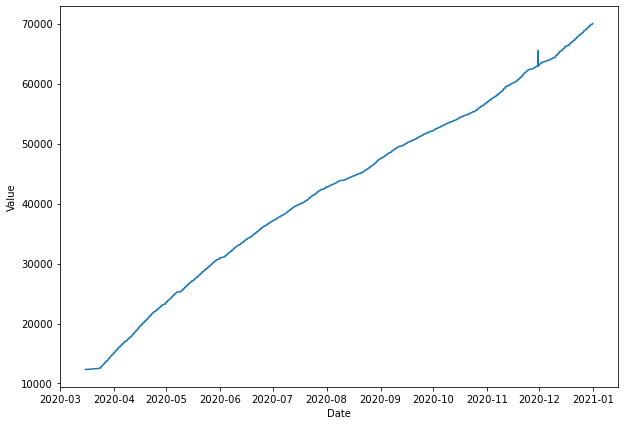

In [66]:
plt.figure(figsize=(10,7))
condition = ~(total_energy_inv01_2020.Value.isin(list(total_energy_inv01_2020.sort_values('Value', ascending=False).head(11)['Value'])))
sns.lineplot(x = 'Date', y = 'Value',data = total_energy_inv01_2020[(total_energy_inv01_2020.Value != 0) & condition])

In [7]:
total_energy_inv01_2020.sort_values('Value', ascending=False).head(20)

,Date,Timestamp,Value,Signal
96995,2020-05-26 09:23:00,1.590470e+12,251707599,Inv01_Total_Energy
123487,2020-06-30 13:16:00,1.593500e+12,16840953,Inv01_Total_Energy
234041,2020-12-09 06:22:00,1.607480e+12,6316688,Inv01_Total_Energy
157797,2020-08-23 10:16:00,1.598160e+12,790288,Inv01_Total_Energy
180971,2020-09-27 08:28:00,1.601180e+12,790288,Inv01_Total_Energy
230157,2020-12-03 10:16:00,1.606970e+12,790288,Inv01_Total_Energy
249056,2020-12-27 21:10:00,1.609080e+12,790288,Inv01_Total_Energy
237957,2020-12-13 18:56:00,1.607870e+12,525072,Inv01_Total_Energy
207906,2020-11-02 13:40:00,1.604300e+12,395016,Inv01_Total_Energy
211506,2020-11-07 12:15:00,1.604730e+12,395016,Inv01_Total_Energy


In [67]:
total_energy_inv01_2020[(total_energy_inv01_2020.Date >= '26-05-2020') & (total_energy_inv01_2020.Hour >= '26-05-2020')]

,Date,Timestamp,Value,Signal,Hour
96801,2020-05-26 05:54:00,1.590450e+12,0,Inv01_Total_Energy,5
96802,2020-05-26 05:57:00,1.590450e+12,29627,Inv01_Total_Energy,5
96803,2020-05-26 05:58:00,1.590450e+12,29627,Inv01_Total_Energy,5
96804,2020-05-26 05:59:00,1.590450e+12,29627,Inv01_Total_Energy,5
96805,2020-05-26 06:00:00,1.590450e+12,29627,Inv01_Total_Energy,6
...,...,...,...,...,...
251953,2020-12-31 17:49:00,1.609420e+12,69998,Inv01_Total_Energy,17
251954,2020-12-31 17:50:00,1.609420e+12,69998,Inv01_Total_Energy,17
251955,2020-12-31 17:51:00,1.609420e+12,69998,Inv01_Total_Energy,17
251956,2020-12-31 17:52:00,1.609420e+12,69998,Inv01_Total_Energy,17


<AxesSubplot:xlabel='Date', ylabel='Value'>

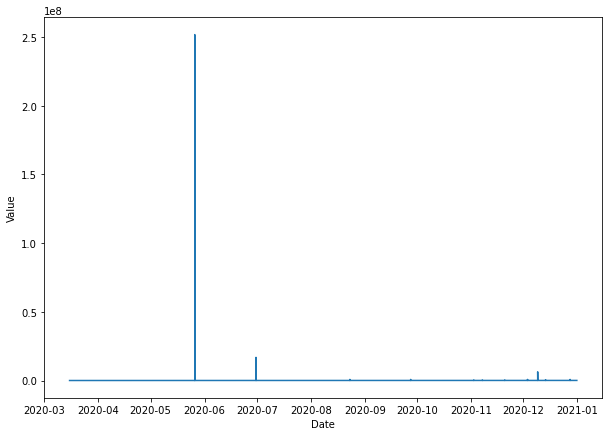

In [65]:
plt.figure(figsize=(10,7))
condition = ~(total_energy_inv01_2020.Value.isin(list(total_energy_inv01_2020.sort_values('Value', ascending=False).head(11)['Value'])))
sns.lineplot(x = 'Date', y = 'Value',data = total_energy_inv01_2020[(total_energy_inv01_2020.Value != 0) & condition])

In [9]:
previous_value = 0
rows = []
for row in total_energy_inv01_2020[total_energy_inv01_2020.Value != 0].itertuples():
    if row.Value >= previous_value:
        previous_value = row.Value
    else:
        if abs(row.Value - previous_value) > 100:
            print(row, previous_value)
        rows.append((row, previous_value, abs(row.Value - previous_value)))
        previous_value = row.Value

Pandas(Index=96996, Date=Timestamp('2020-05-26 09:24:00'), Timestamp=1590470000000.0, Value=29669, Signal='Inv01_Total_Energy') 251707599
Pandas(Index=123488, Date=Timestamp('2020-06-30 13:17:00'), Timestamp=1593500000000.0, Value=37035, Signal='Inv01_Total_Energy') 16840953
Pandas(Index=157798, Date=Timestamp('2020-08-23 10:17:00'), Timestamp=1598160000000.0, Value=45540, Signal='Inv01_Total_Energy') 790288
Pandas(Index=180972, Date=Timestamp('2020-09-27 08:29:00'), Timestamp=1601180000000.0, Value=51667, Signal='Inv01_Total_Energy') 790288
Pandas(Index=207907, Date=Timestamp('2020-11-02 13:41:00'), Timestamp=1604300000000.0, Value=57233, Signal='Inv01_Total_Energy') 395016
Pandas(Index=211507, Date=Timestamp('2020-11-07 12:16:00'), Timestamp=1604730000000.0, Value=58265, Signal='Inv01_Total_Energy') 395016
Pandas(Index=220807, Date=Timestamp('2020-11-20 08:21:00'), Timestamp=1605840000000.0, Value=60932, Signal='Inv01_Total_Energy') 395016
Pandas(Index=228014, Date=Timestamp('2020-11

In [52]:
total_energy_inv01_2020.loc[:, 'Hour'] = total_energy_inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[0]))

<AxesSubplot:xlabel='Hour', ylabel='count'>

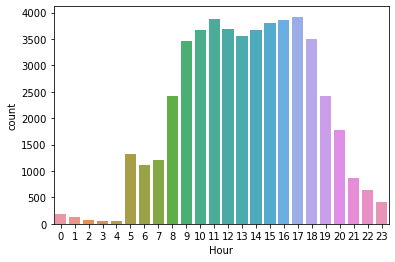

In [53]:
sns.countplot(x = 'Hour', data = total_energy_inv01_2020[total_energy_inv01_2020.Value == 0])

In [64]:
total_energy_inv01_2020[(total_energy_inv01_2020.Hour.isin([9,10,11,12,13,14,15,16,17])) & (total_energy_inv01_2020.Value == 0)].Date.nunique()

33508

In [76]:
today_energy_inv01_2020.loc[:, 'Date'] = pd.to_datetime(today_energy_inv01_2020[['Date']].stack()).unstack()
today_energy_inv01_2020.loc[:, 'Hour'] = today_energy_inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[0]))

In [84]:
val_not_t_be_considered = list(today_energy_inv01_2020.sort_values('Value', ascending=False).head(9)['Value'])

In [86]:
new_df = today_energy_inv01_2020[~today_energy_inv01_2020.Value.isin(val_not_t_be_considered)]
new_df.shape

(251949, 5)

In [91]:
new_df.loc[:, 'Only_Date'] = new_df.Date.apply(lambda x: str(x.date()))
new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Date,Timestamp,Value,Signal,Hour,Only_Date
0,2020-01-01 00:32:00,1577818920000,0,Inv01_Today_Energy,0,2020-01-01
1,2020-01-01 00:33:00,1577818980000,0,Inv01_Today_Energy,0,2020-01-01
2,2020-01-01 08:24:00,1577847240000,0,Inv01_Today_Energy,8,2020-01-01
3,2020-01-01 08:25:00,1577847300000,0,Inv01_Today_Energy,8,2020-01-01
4,2020-01-01 08:26:00,1577847360000,0,Inv01_Today_Energy,8,2020-01-01


In [98]:
grouped_by_date_today_energy_2020_inv01 = new_df.groupby('Only_Date').sum().reset_index()[['Only_Date', 'Value']]
grouped_by_date_today_energy_2020_inv01.head()

,Only_Date,Value
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0


In [108]:
temp_2020 = pd.read_csv("Data/Required Data Inverterwise/wms01/2020_temp_data.csv")
temp_2020.head()

,Date,Timestamp,Value,Signal
0,2020-01-01 00:32:00,1577818920000,0,Wms01_Temp
1,2020-01-01 00:33:00,1577818980000,198,Wms01_Temp
2,2020-01-01 08:24:00,1577847240000,0,Wms01_Temp
3,2020-01-01 08:25:00,1577847300000,212,Wms01_Temp
4,2020-01-01 08:26:00,1577847360000,213,Wms01_Temp


In [109]:
temp_2020.loc[:, 'Date'] = pd.to_datetime(temp_2020[['Date']].stack()).unstack()

In [110]:
temp_2020.loc[:, 'Only_Date'] = temp_2020.Date.apply(lambda x: str(x.date()))
temp_2020.head()

,Date,Timestamp,Value,Signal,Only_Date
0,2020-01-01 00:32:00,1577818920000,0,Wms01_Temp,2020-01-01
1,2020-01-01 00:33:00,1577818980000,198,Wms01_Temp,2020-01-01
2,2020-01-01 08:24:00,1577847240000,0,Wms01_Temp,2020-01-01
3,2020-01-01 08:25:00,1577847300000,212,Wms01_Temp,2020-01-01
4,2020-01-01 08:26:00,1577847360000,213,Wms01_Temp,2020-01-01


In [111]:
temp_2020 = temp_2020.groupby('Only_Date').max().reset_index()
temp_2020.head()

,Only_Date,Date,Timestamp,Value,Signal
0,2020-01-01,2020-01-01 18:26:00,1577883360000,279,Wms01_Temp
1,2020-01-02,2020-01-02 23:29:00,1577987940000,323,Wms01_Temp
2,2020-01-03,2020-01-03 18:28:00,1578056280000,356,Wms01_Temp
3,2020-01-04,2020-01-04 19:26:00,1578146160000,336,Wms01_Temp
4,2020-01-05,2020-01-05 19:33:00,1578232980000,369,Wms01_Temp


In [112]:
temp_2020.loc[:, 'Value'] = temp_2020.Value.apply(lambda x: x/10)
temp_2020.head()

,Only_Date,Date,Timestamp,Value,Signal
0,2020-01-01,2020-01-01 18:26:00,1577883360000,27.9,Wms01_Temp
1,2020-01-02,2020-01-02 23:29:00,1577987940000,32.3,Wms01_Temp
2,2020-01-03,2020-01-03 18:28:00,1578056280000,35.6,Wms01_Temp
3,2020-01-04,2020-01-04 19:26:00,1578146160000,33.6,Wms01_Temp
4,2020-01-05,2020-01-05 19:33:00,1578232980000,36.9,Wms01_Temp


In [117]:
combined_df = temp_2020.merge(grouped_by_date_today_energy_2020_inv01, on = 'Only_Date')
combined_df.rename({'Value_x':'Temperature', 'Value_y': 'Energy'})
combined_df.head()

,Only_Date,Date,Timestamp,Value_x,Signal,Value_y
0,2020-01-01,2020-01-01 18:26:00,1577883360000,27.9,Wms01_Temp,0
1,2020-01-02,2020-01-02 23:29:00,1577987940000,32.3,Wms01_Temp,0
2,2020-01-03,2020-01-03 18:28:00,1578056280000,35.6,Wms01_Temp,0
3,2020-01-04,2020-01-04 19:26:00,1578146160000,33.6,Wms01_Temp,0
4,2020-01-05,2020-01-05 19:33:00,1578232980000,36.9,Wms01_Temp,0


<AxesSubplot:xlabel='Hour', ylabel='count'>

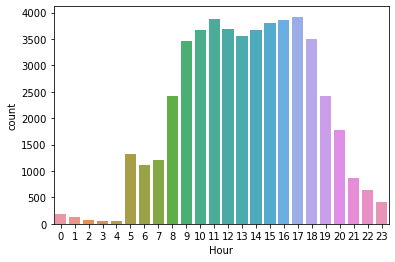

In [54]:
total_energy_inv01_2021.loc[:, 'Date'] = pd.to_datetime(total_energy_inv01_2021[['Date']].stack()).unstack()
total_energy_inv01_2021.loc[:, 'Hour'] = total_energy_inv01_2021.Date.apply(lambda x: int(str(x.time()).split(':')[0]))
sns.countplot(x = 'Hour', data = total_energy_inv01_2020[total_energy_inv01_2020.Value == 0])